In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

%matplotlib inline

In [118]:
#Reading dataset
df = pd.read_csv ('../data/train.csv')
df.head(10)
# Find only numerical data ... df_num2 = df._get_numeric_data()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


Output variable - Kurtosis =  6.509812011089439
Output variable - Skewness =  1.880940746034036
 


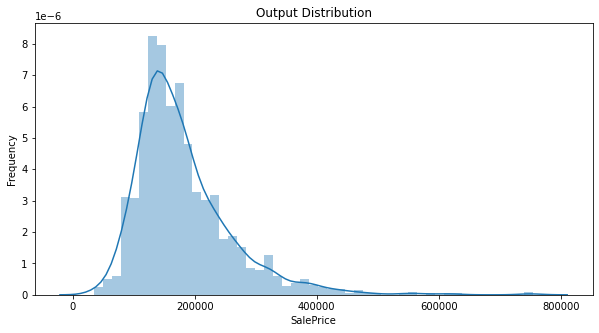

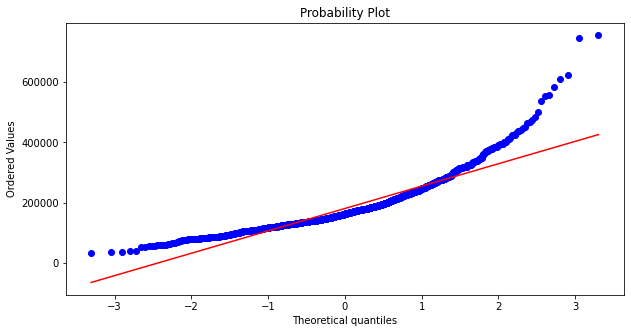

In [8]:
#EDA
#Studying the output parameter - SalesPrice

#Description
df['SalePrice'].describe()

#Plot
#ax1 = plt.subplot(221)
plt.figure(figsize=(10,5))
sns.distplot(df['SalePrice'])
plt.title('Output Distribution')
plt.ylabel('Frequency')


#Normal probability test
plt.figure(figsize=(10,5))
stats.probplot(df['SalePrice'], plot=plt)
plt.tight_layout

#Skewness and Kurtosis
print('Output variable - Kurtosis = ',stats.kurtosis(df['SalePrice']))
print('Output variable - Skewness = ',stats.skew(df['SalePrice']))
print(" ")

Output variable - Kurtosis =  0.8026555069117713
Output variable - Skewness =  0.1212103673013655
 


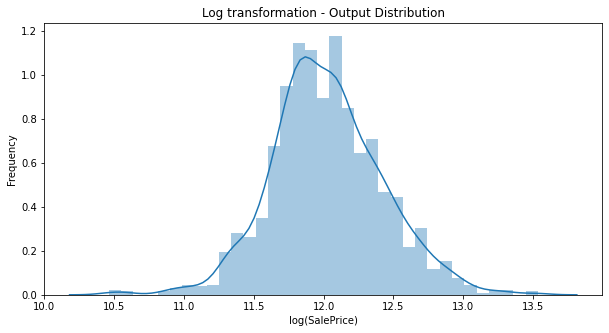

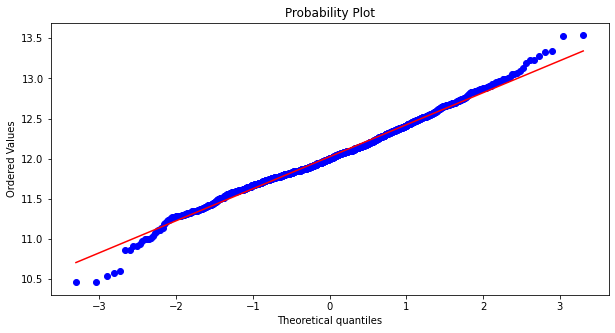

In [9]:
#Data transformation
    #Log transformation

#Plot
plt.figure(figsize=(10,5))
sns.distplot(np.log(df['SalePrice']))
plt.title('Log transformation - Output Distribution')
plt.ylabel('Frequency')
plt.xlabel('log(SalePrice)')

#Normal probability test
plt.figure(figsize=(10,5))
stats.probplot(np.log(df['SalePrice']), plot=plt)
plt.tight_layout

#Skewness and Kurtosis
print('Output variable - Kurtosis = ',stats.kurtosis(np.log(df['SalePrice'])))
print('Output variable - Skewness = ',stats.skew(np.log(df['SalePrice'])))
print(" ")

Output variable - Kurtosis =  0.870759906431624
Output variable - Skewness =  -0.008644001143304075
 


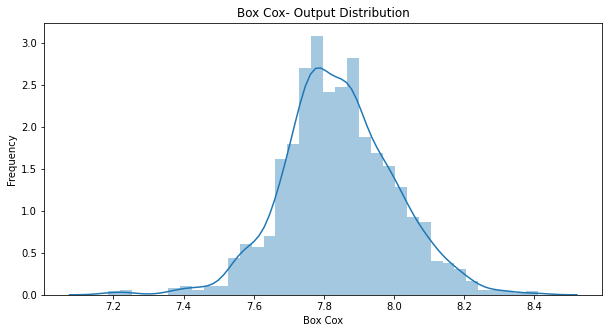

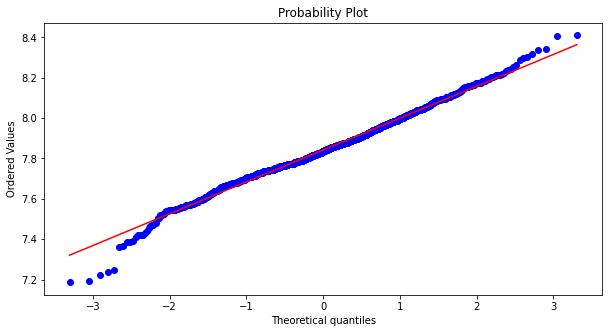

In [10]:
    #Box Cox transformation
alfa = 1
bcox,_,_ = stats.boxcox(df['SalePrice'],alpha=alfa)
#Plot 
plt.figure(figsize=(10,5))
sns.distplot(bcox)
plt.title('Box Cox- Output Distribution')
plt.ylabel('Frequency')
plt.xlabel('Box Cox')

#Normal probability test
plt.figure(figsize=(10,5))
stats.probplot(bcox, plot=plt)
plt.tight_layout

#Skewness and Kurtosis
print('Output variable - Kurtosis = ',stats.kurtosis(bcox))
print('Output variable - Skewness = ',stats.skew(bcox))
print(" ") 

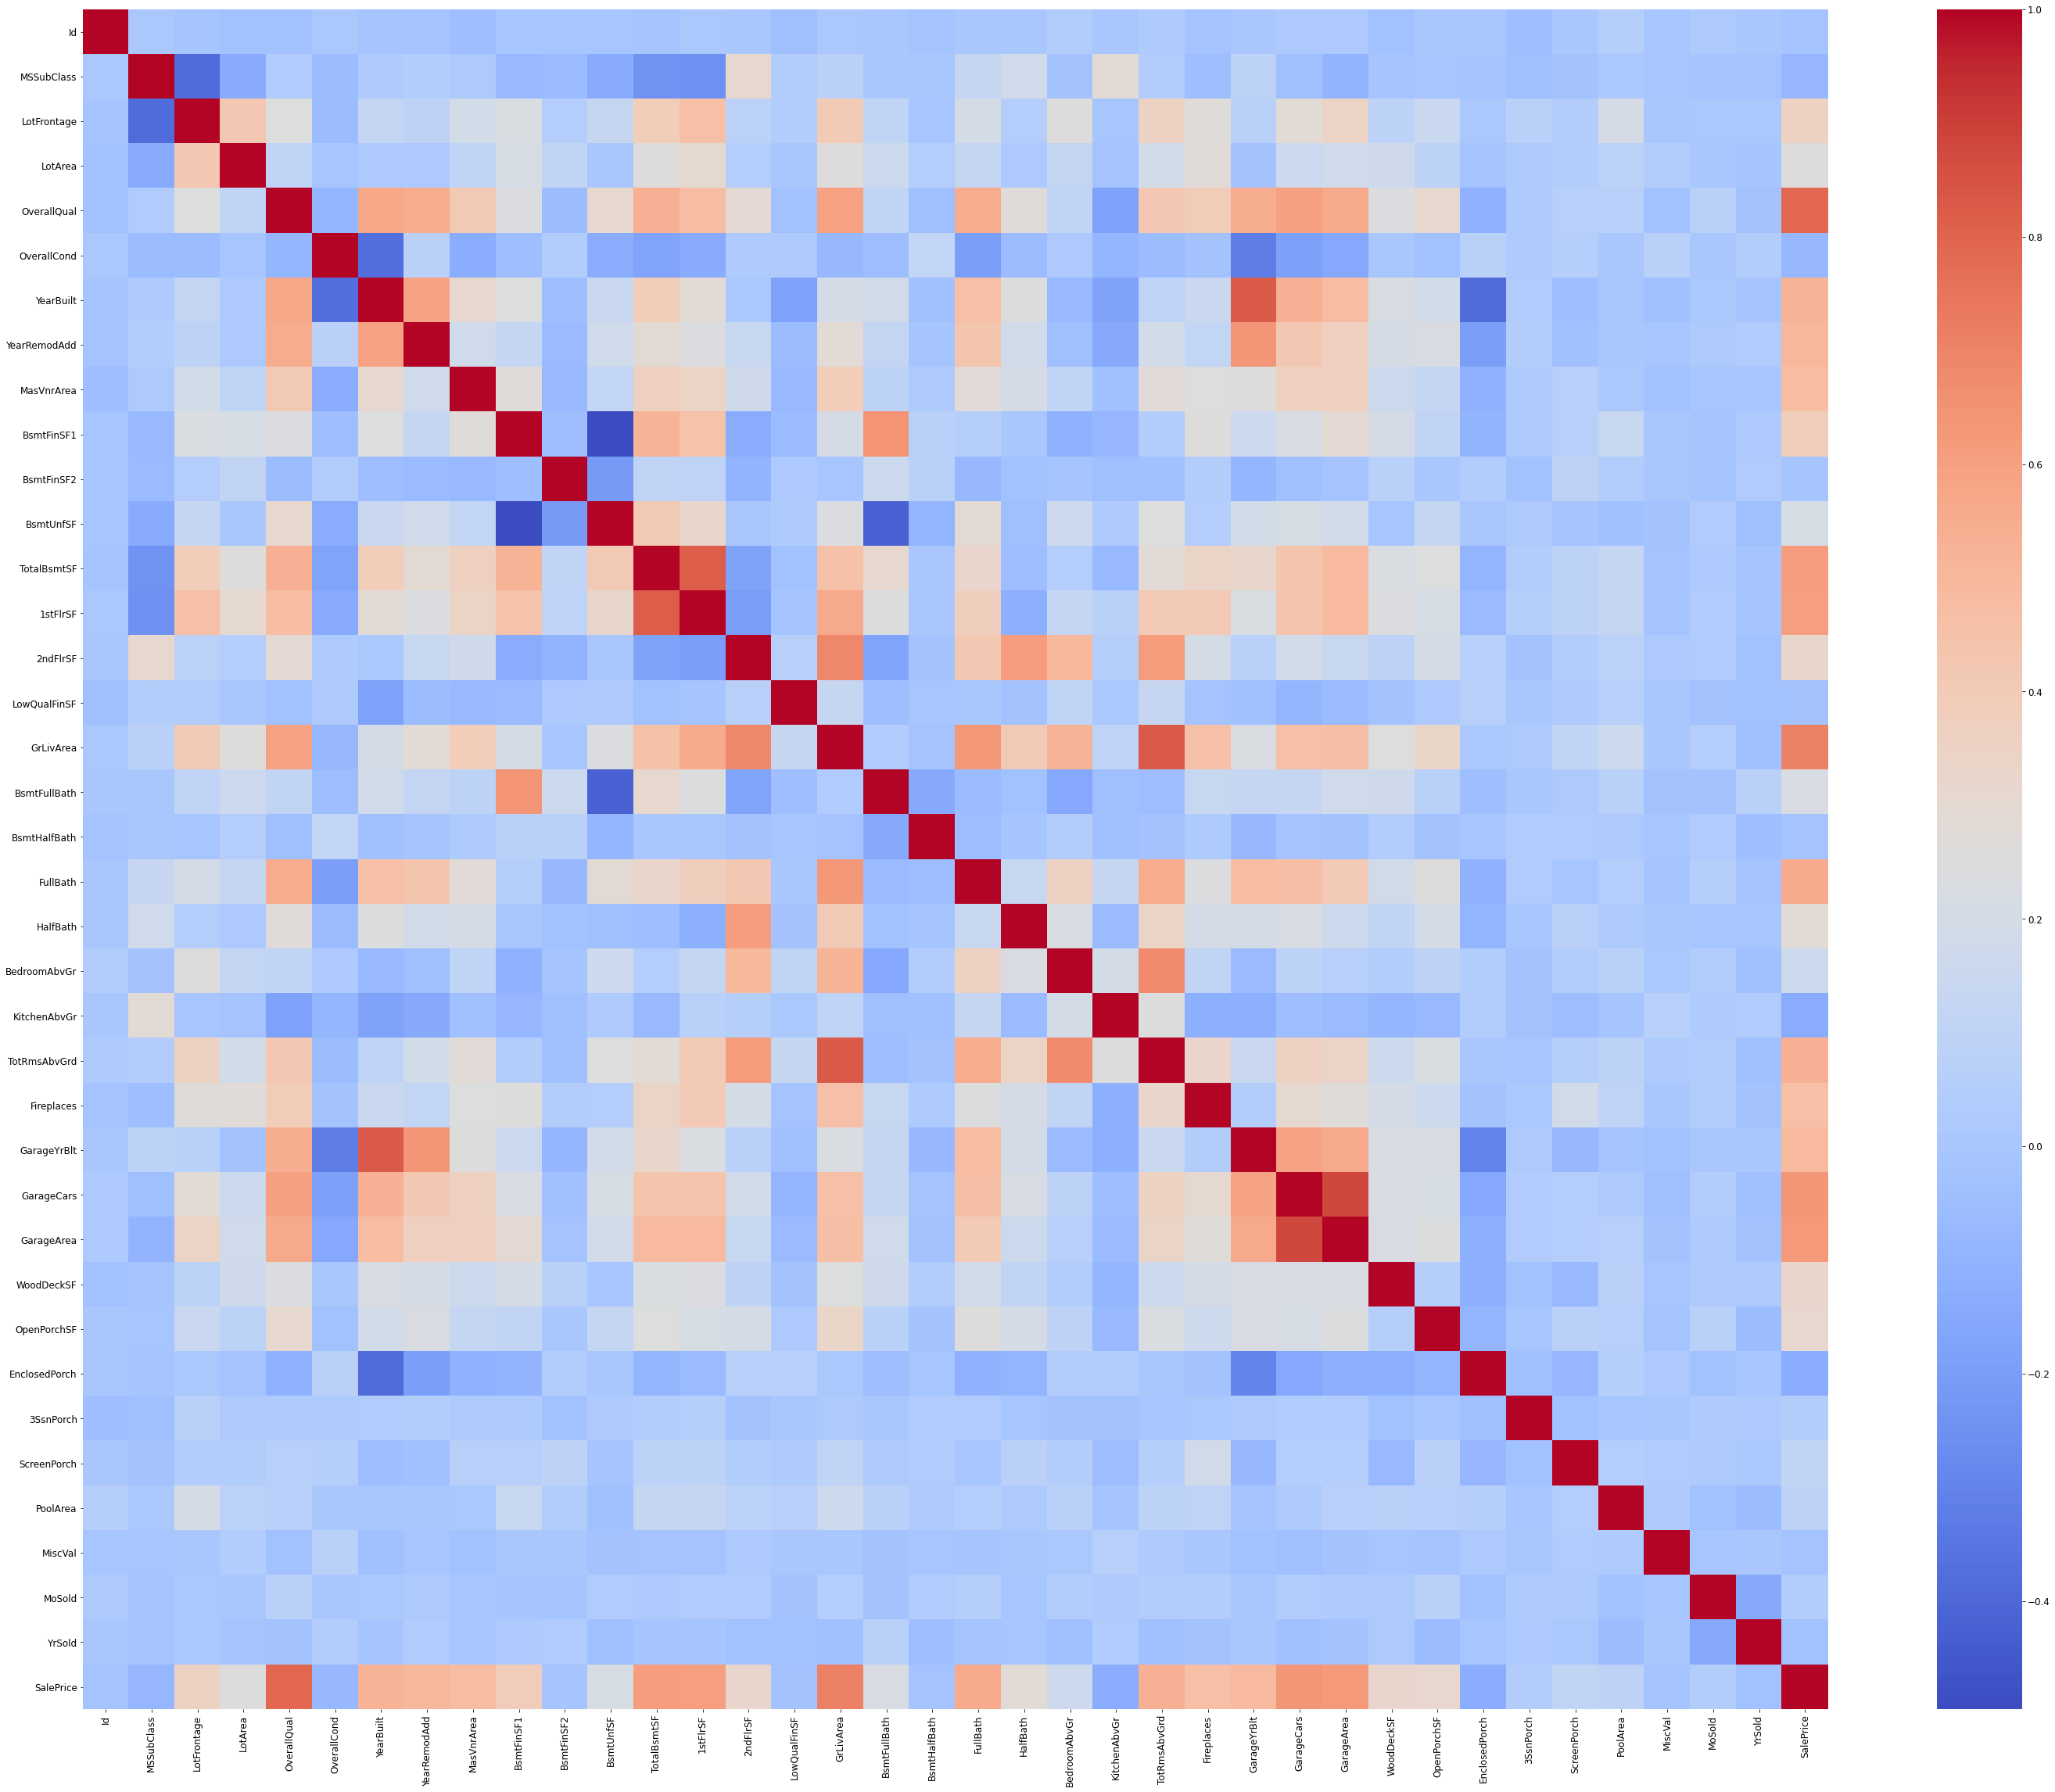

In [40]:
crr = df.corr()
plt.rc('font', size=12)
plt.figure(figsize=(50,40))
sns.heatmap(crr,cmap='coolwarm')

In [109]:
#Defining variables that may impact the output
obj_var = ['BldgType','KitchenQual', 'OverallCond', 'YearBuilt','ExterCond', 'Foundation', 'BsmtQual','HeatingQC','GarageQual','MiscFeature','SaleType',  'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd', 'SaleType']
num_var = ['1stFlrSF', '2ndFlrSF',
       'WoodDeckSF', 'OpenPorchSF']
out = ['SalePrice']
removed = ['YrSold','GarageArea','GrLivArea', 'PoolArea', 'EnclosedPorch']
#Defining new datasets to further studies
df_obj = df[obj_var]
df_num = df[num_var]
df_out = df[out]

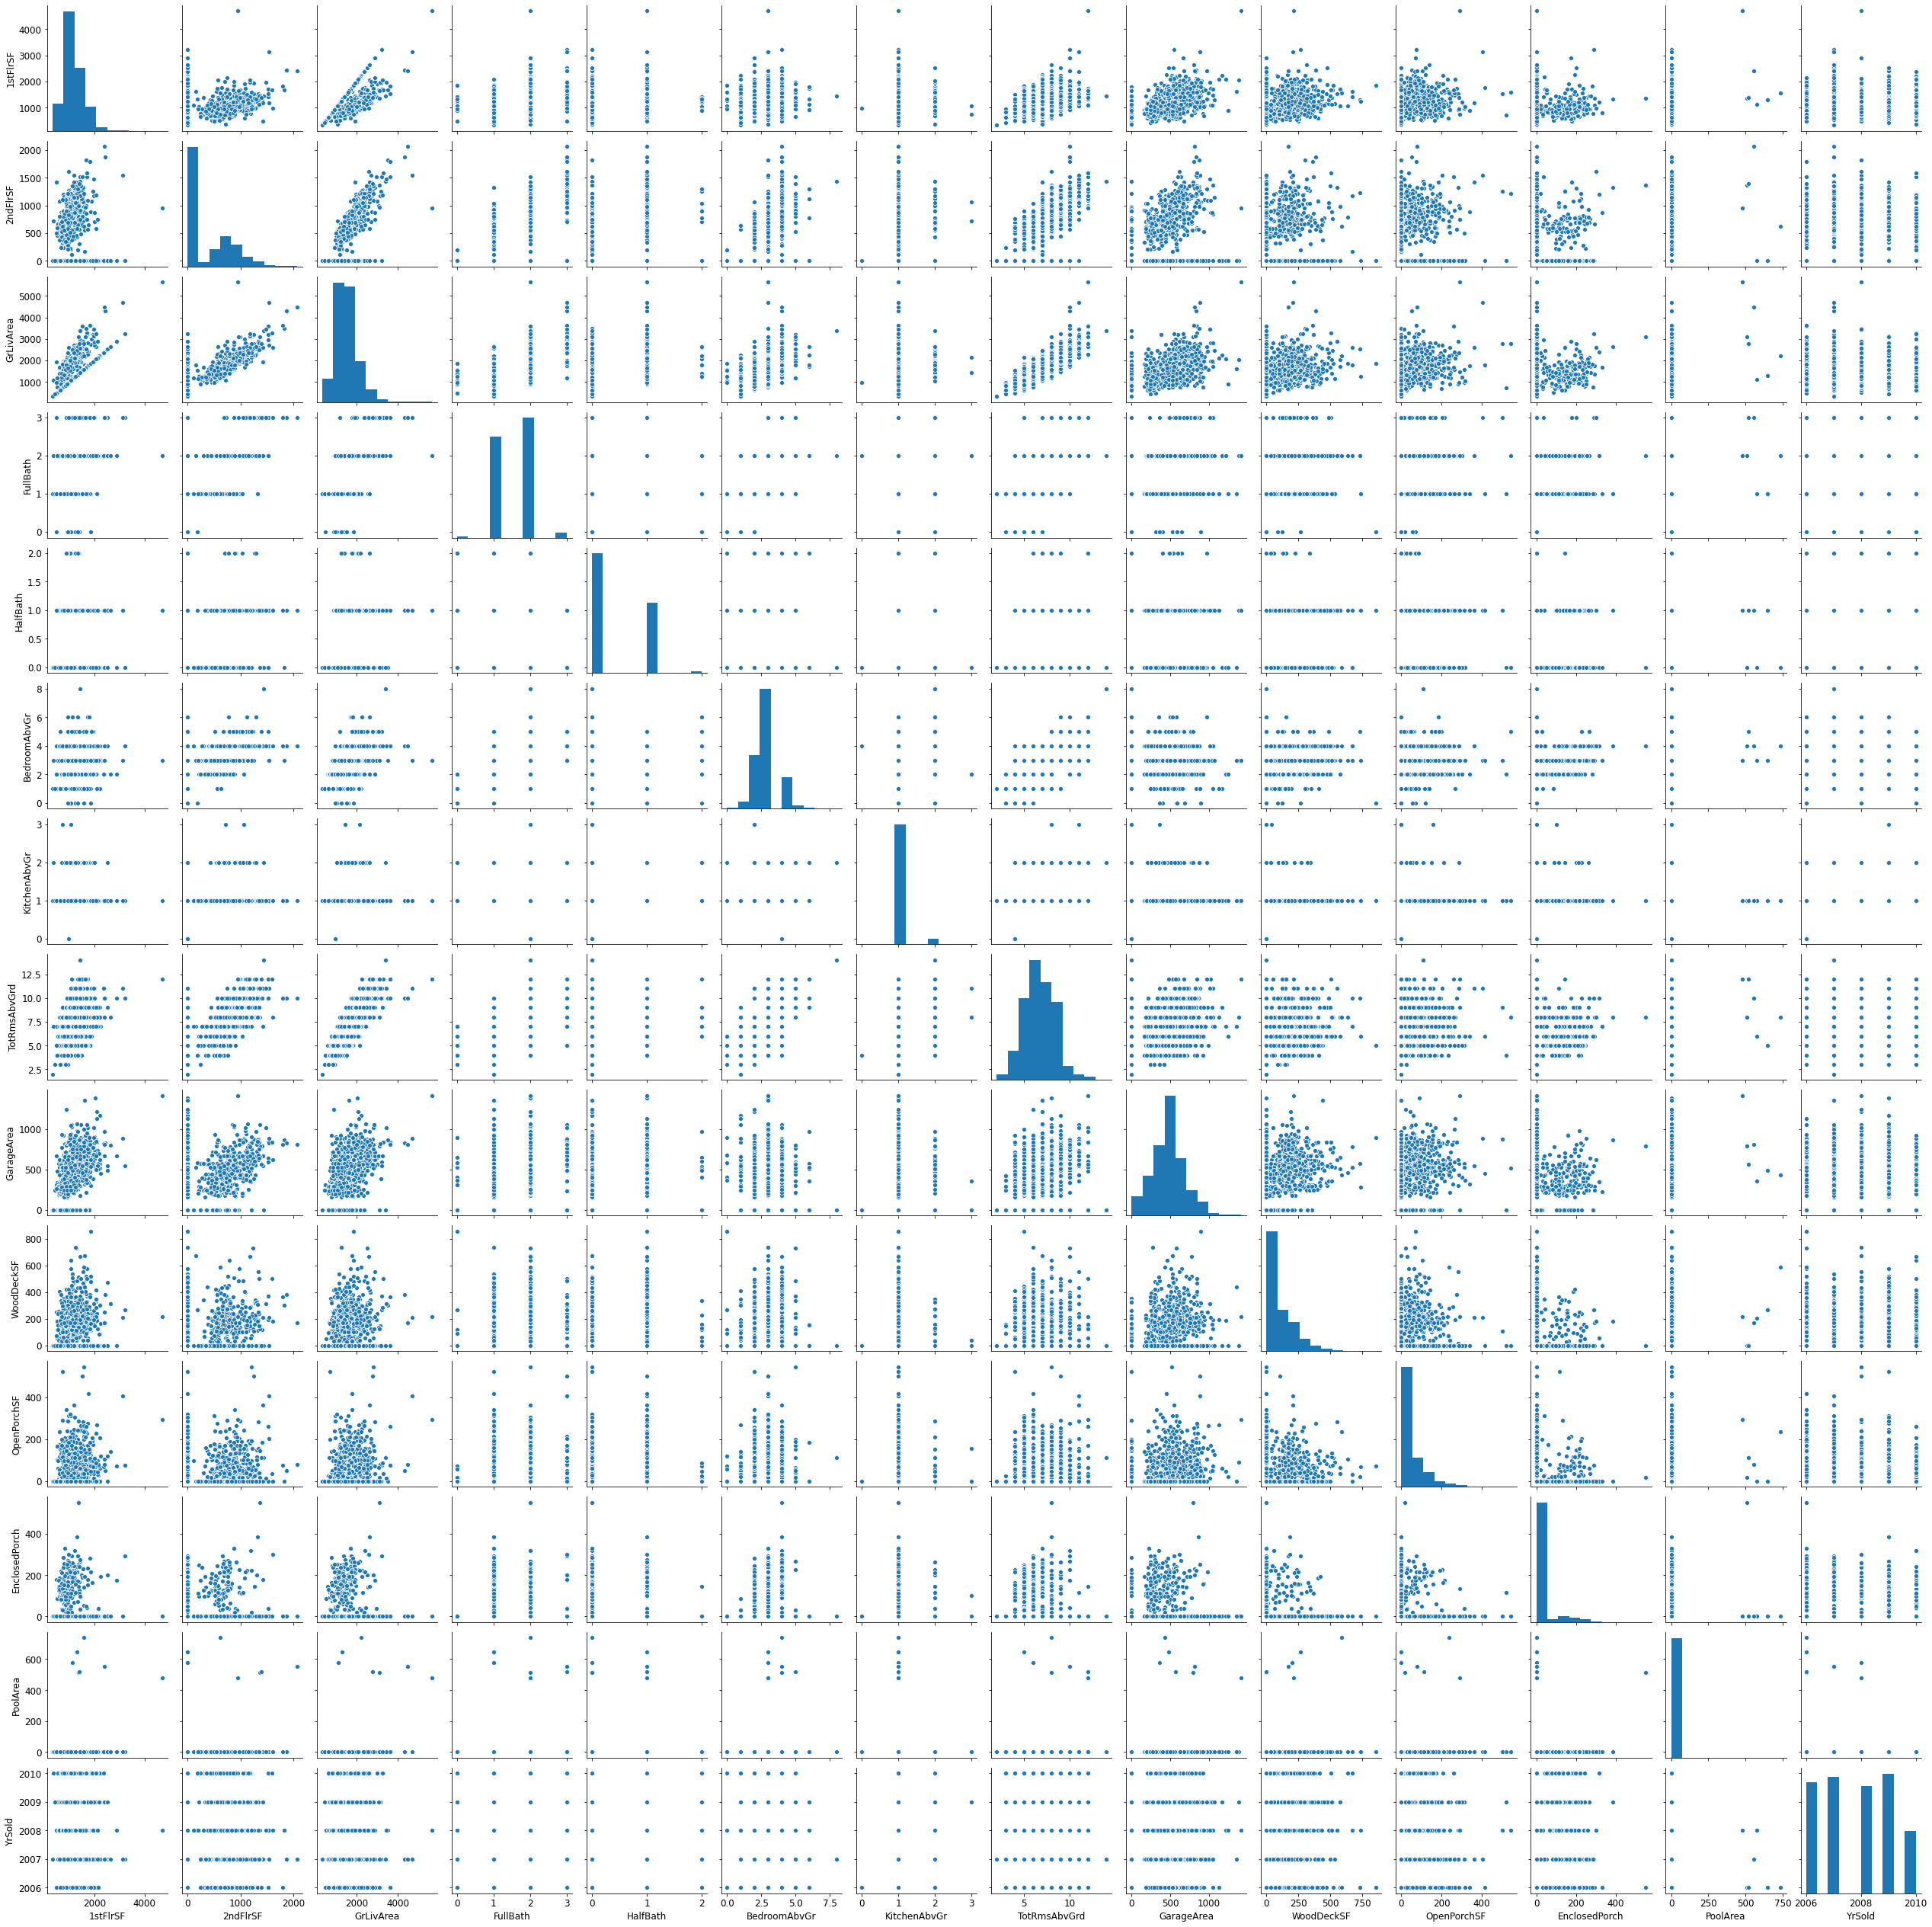

In [41]:
#Studying df_num
#Pair plot
sns.pairplot(df_num)

In [112]:
#Analisando pelo vif

#X = df_num.assign(const=1)
X=df_num
X.head()
vif=pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)
print(vif)

#Analisando o vetor encontrado
#sns.pairplot(df_num)

1stFlrSF        644.826597
2ndFlrSF        135.955328
WoodDeckSF        1.693360
OpenPorchSF       1.669327
GrLivArea      1093.982768
dtype: float64
